<a href="https://colab.research.google.com/github/Fakhryrama/Data_Mining/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Praktikum Decision Tree

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
from IPython.display import Image
from io import StringIO
colnames =["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
df = pd.read_csv('/content/drive/MyDrive/Datasets/winequality-red.csv', delimiter=';')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.shape

(1599, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


EDA

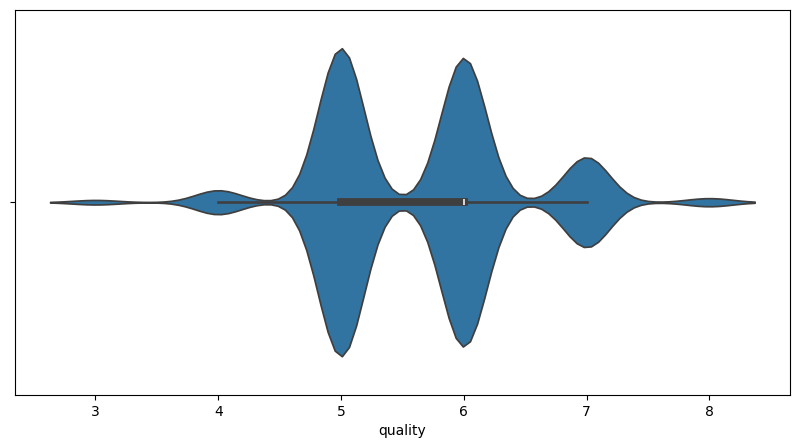

In [ ]:
plt.figure(figsize = (10,5)) # Create a figure using plt.figure
ax = sns.violinplot(x=df['quality']) # Assuming 'quality' is the column you want to visualize
plt.show()

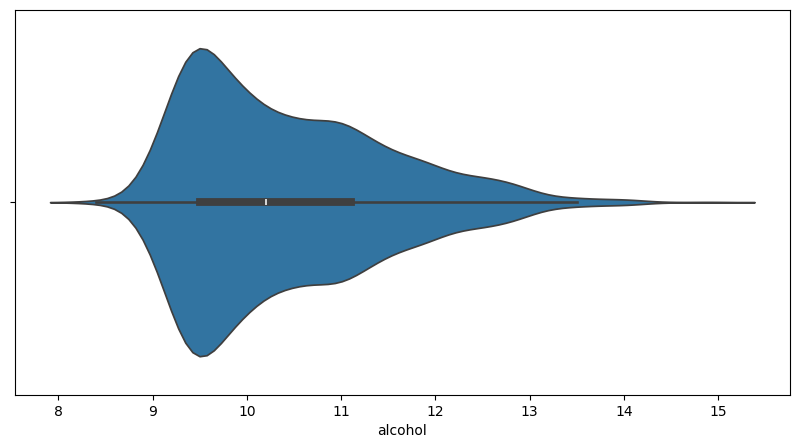

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.violinplot(x=df['alcohol'])
plt.show()

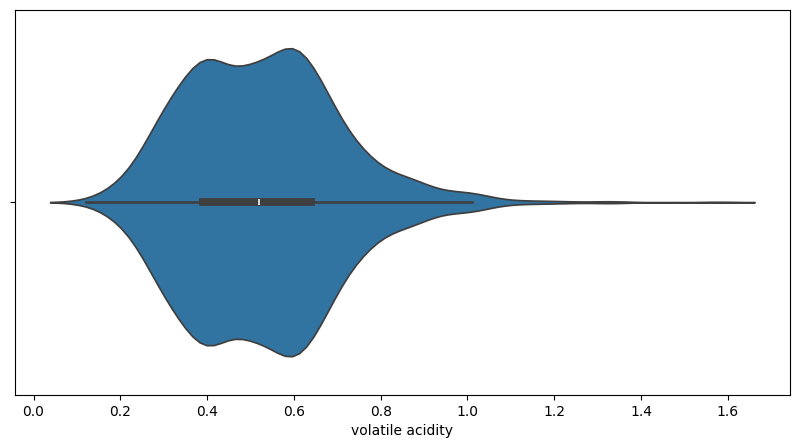

In [ ]:
plt.figure(figsize = (10,5)) # Create a figure using plt.figure
ax = sns.violinplot(x=df['volatile acidity'])
plt.show()

In [ ]:
percentiles = df['volatile acidity'].quantile([0.05,0.95]).values
df['volatile acidity'][df['volatile acidity'] <= percentiles[0]] = percentiles[0]
df['volatile acidity'][df['volatile acidity'] >= percentiles[1]] = percentiles[1]

<ipython-input-17-dd0a765f1c7e>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['volatile acidity'][df['volatile acidity'] <= percentiles[0]] = percentiles[0]
<ipython-input-17-dd0a765f1c7e>:2: SettingWithCopyWarning: 
A value is trying 

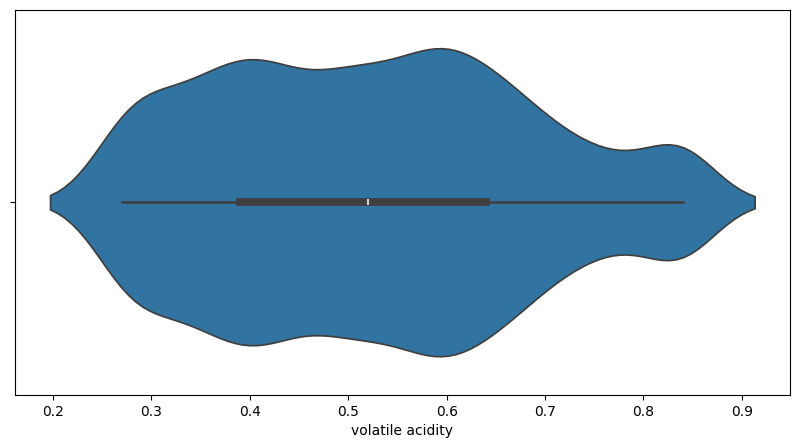

In [ ]:
plt.figure(figsize = (10,5)) # Create a figure using plt.figure
ax = sns.violinplot(x=df['volatile acidity'])
plt.show()

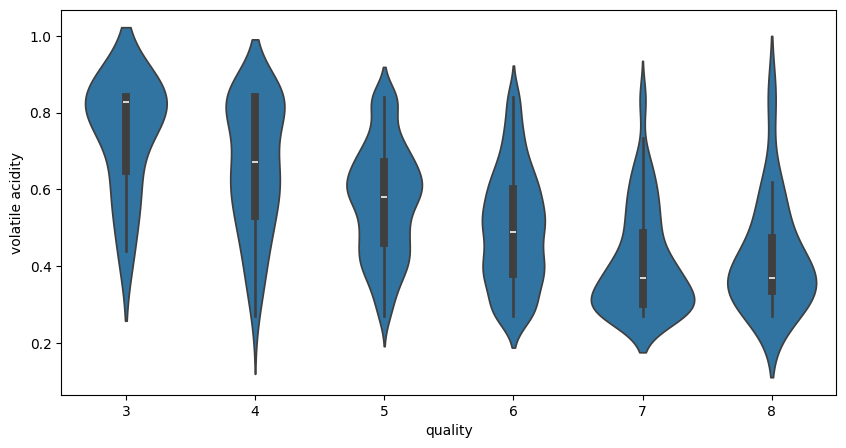

In [ ]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'volatile acidity', x = 'quality', data = df)
plt.show()

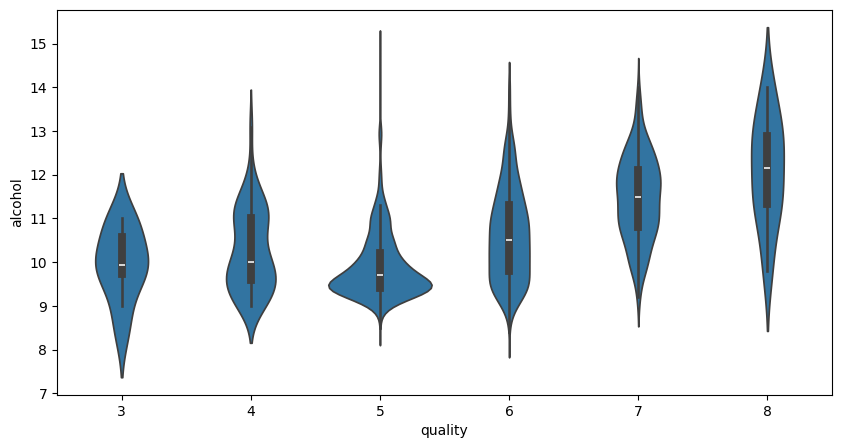

In [ ]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'alcohol', x = 'quality', data = df)
plt.show()

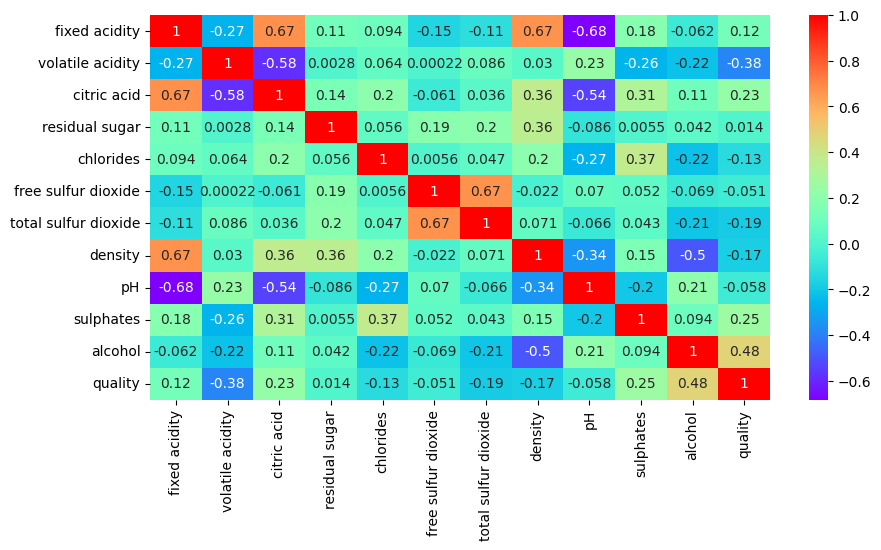

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")
plt.show()

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.523940,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.159491,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.270000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,0.840000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
X = df.drop('quality', axis=1)
y = df['quality']

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=50)
X_train.shape, X_test.shape

((959, 11), (640, 11))

In [ ]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

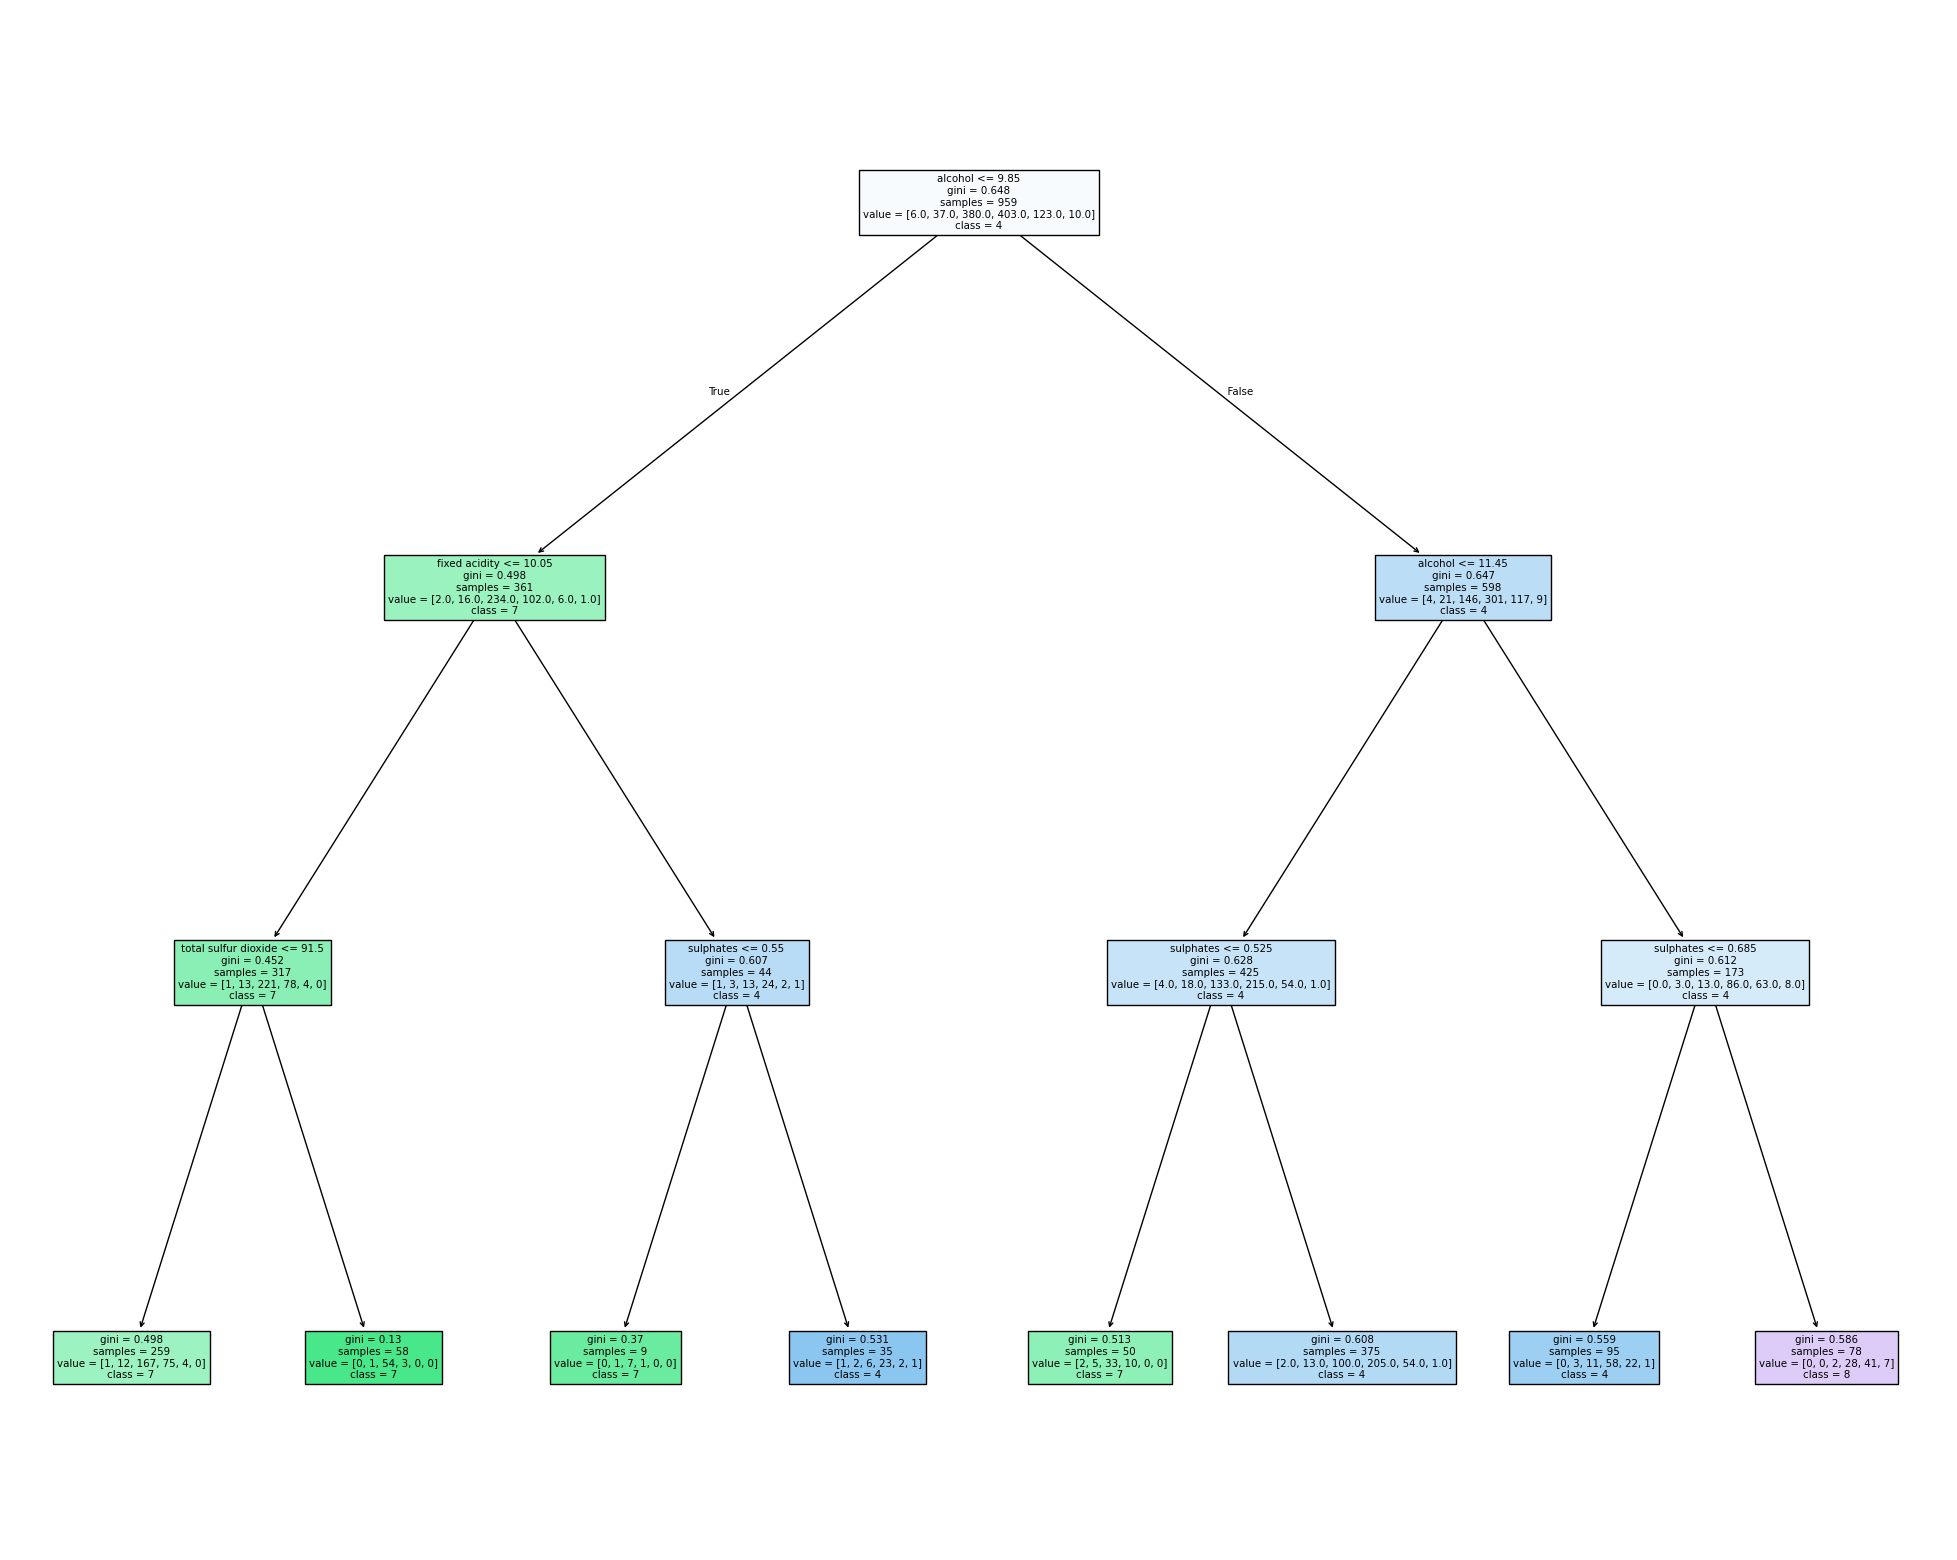

In [ ]:
from sklearn import tree # import the tree module from sklearn

fig = plt.figure(figsize=(25,20))

# Get unique class names from your target variable (y_train or df['quality'])
class_names = [str(i) for i in df['quality'].unique()]

_ = tree.plot_tree(dt, # Now tree is defined and can be used to access plot_tree
                   feature_names=X.columns,
                   class_names=class_names,  # Use the derived class_names
                   filled=True)

Evaluating model performance

In [ ]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.6131386861313869


array([[  0,   0,   3,   3,   0,   0],
       [  0,   0,  19,  18,   0,   0],
       [  0,   0, 261, 117,   2,   0],
       [  0,   0,  89, 286,  28,   0],
       [  0,   0,   4,  78,  41,   0],
       [  0,   0,   0,   3,   7,   0]])

In [ ]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.5953125


array([[  0,   0,   2,   2,   0,   0],
       [  0,   0,   9,   7,   0,   0],
       [  0,   0, 205,  94,   2,   0],
       [  0,   0,  72, 149,  14,   0],
       [  0,   0,   2,  47,  27,   0],
       [  0,   0,   0,   4,   4,   0]])

Creating helper functions to evaluate model performance and help plot the decision tree

In [ ]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    # Get unique class names from your target variable (y_train or df['quality'])
    class_names = [str(i) for i in df['quality'].unique()]
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=class_names,  # Use the derived class_names
                       filled=True)

Without setting any hyper-parameters

In [ ]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

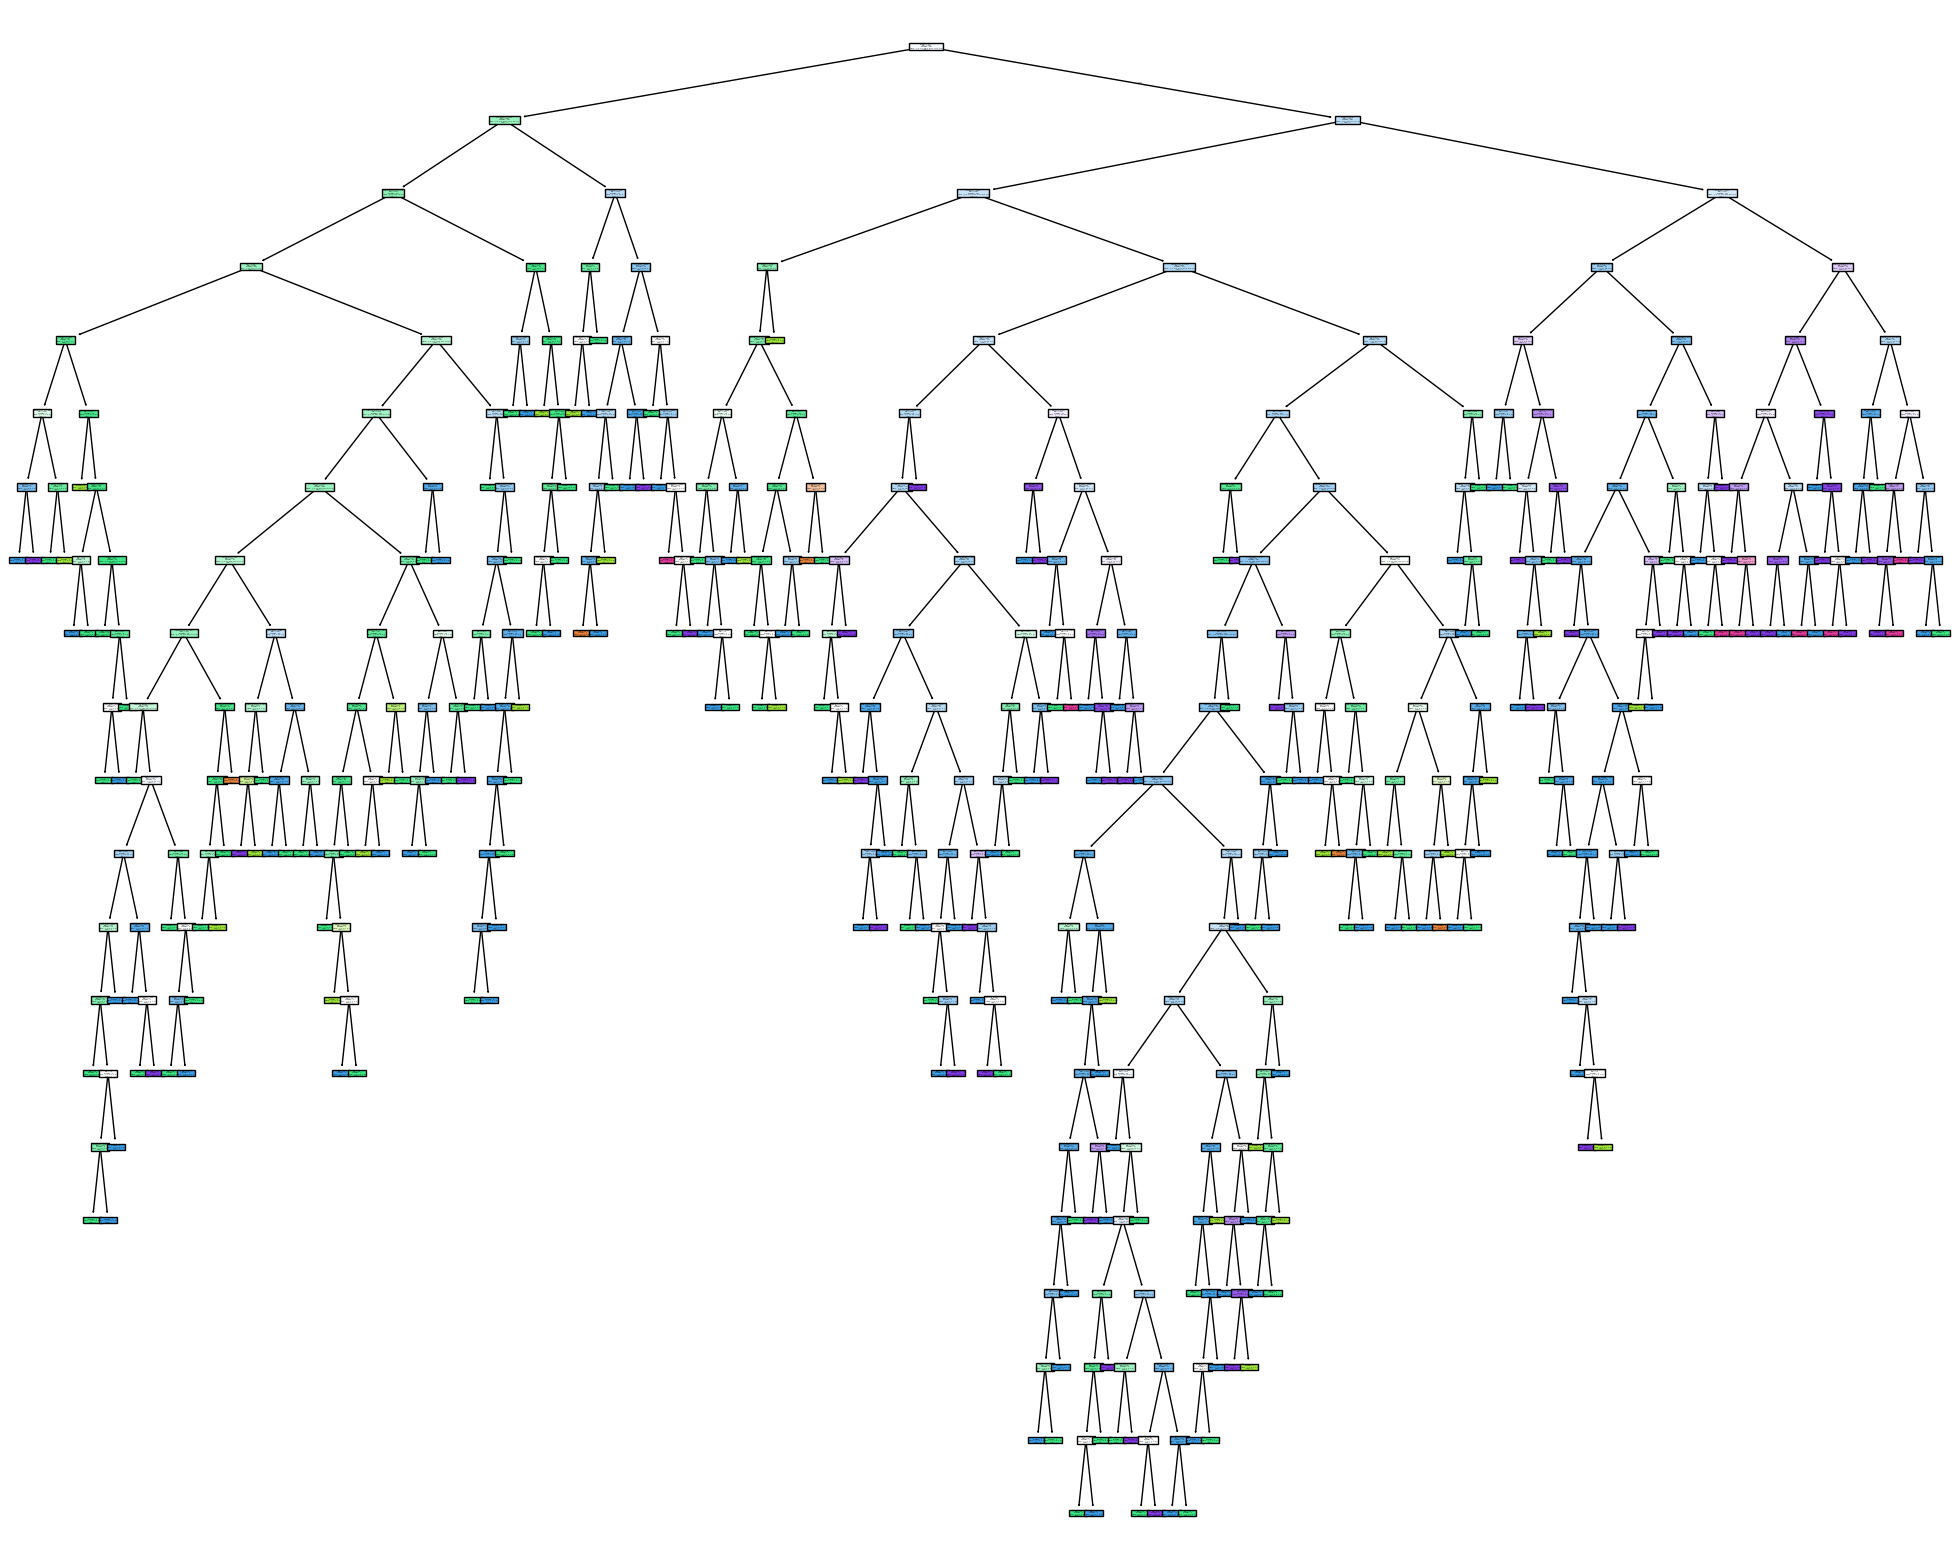

In [ ]:
gph = get_dt_graph(dt_default)

In [ ]:
from sklearn import metrics

def evaluate_model(model):
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

Controlling the depth of the tree

In [ ]:
dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

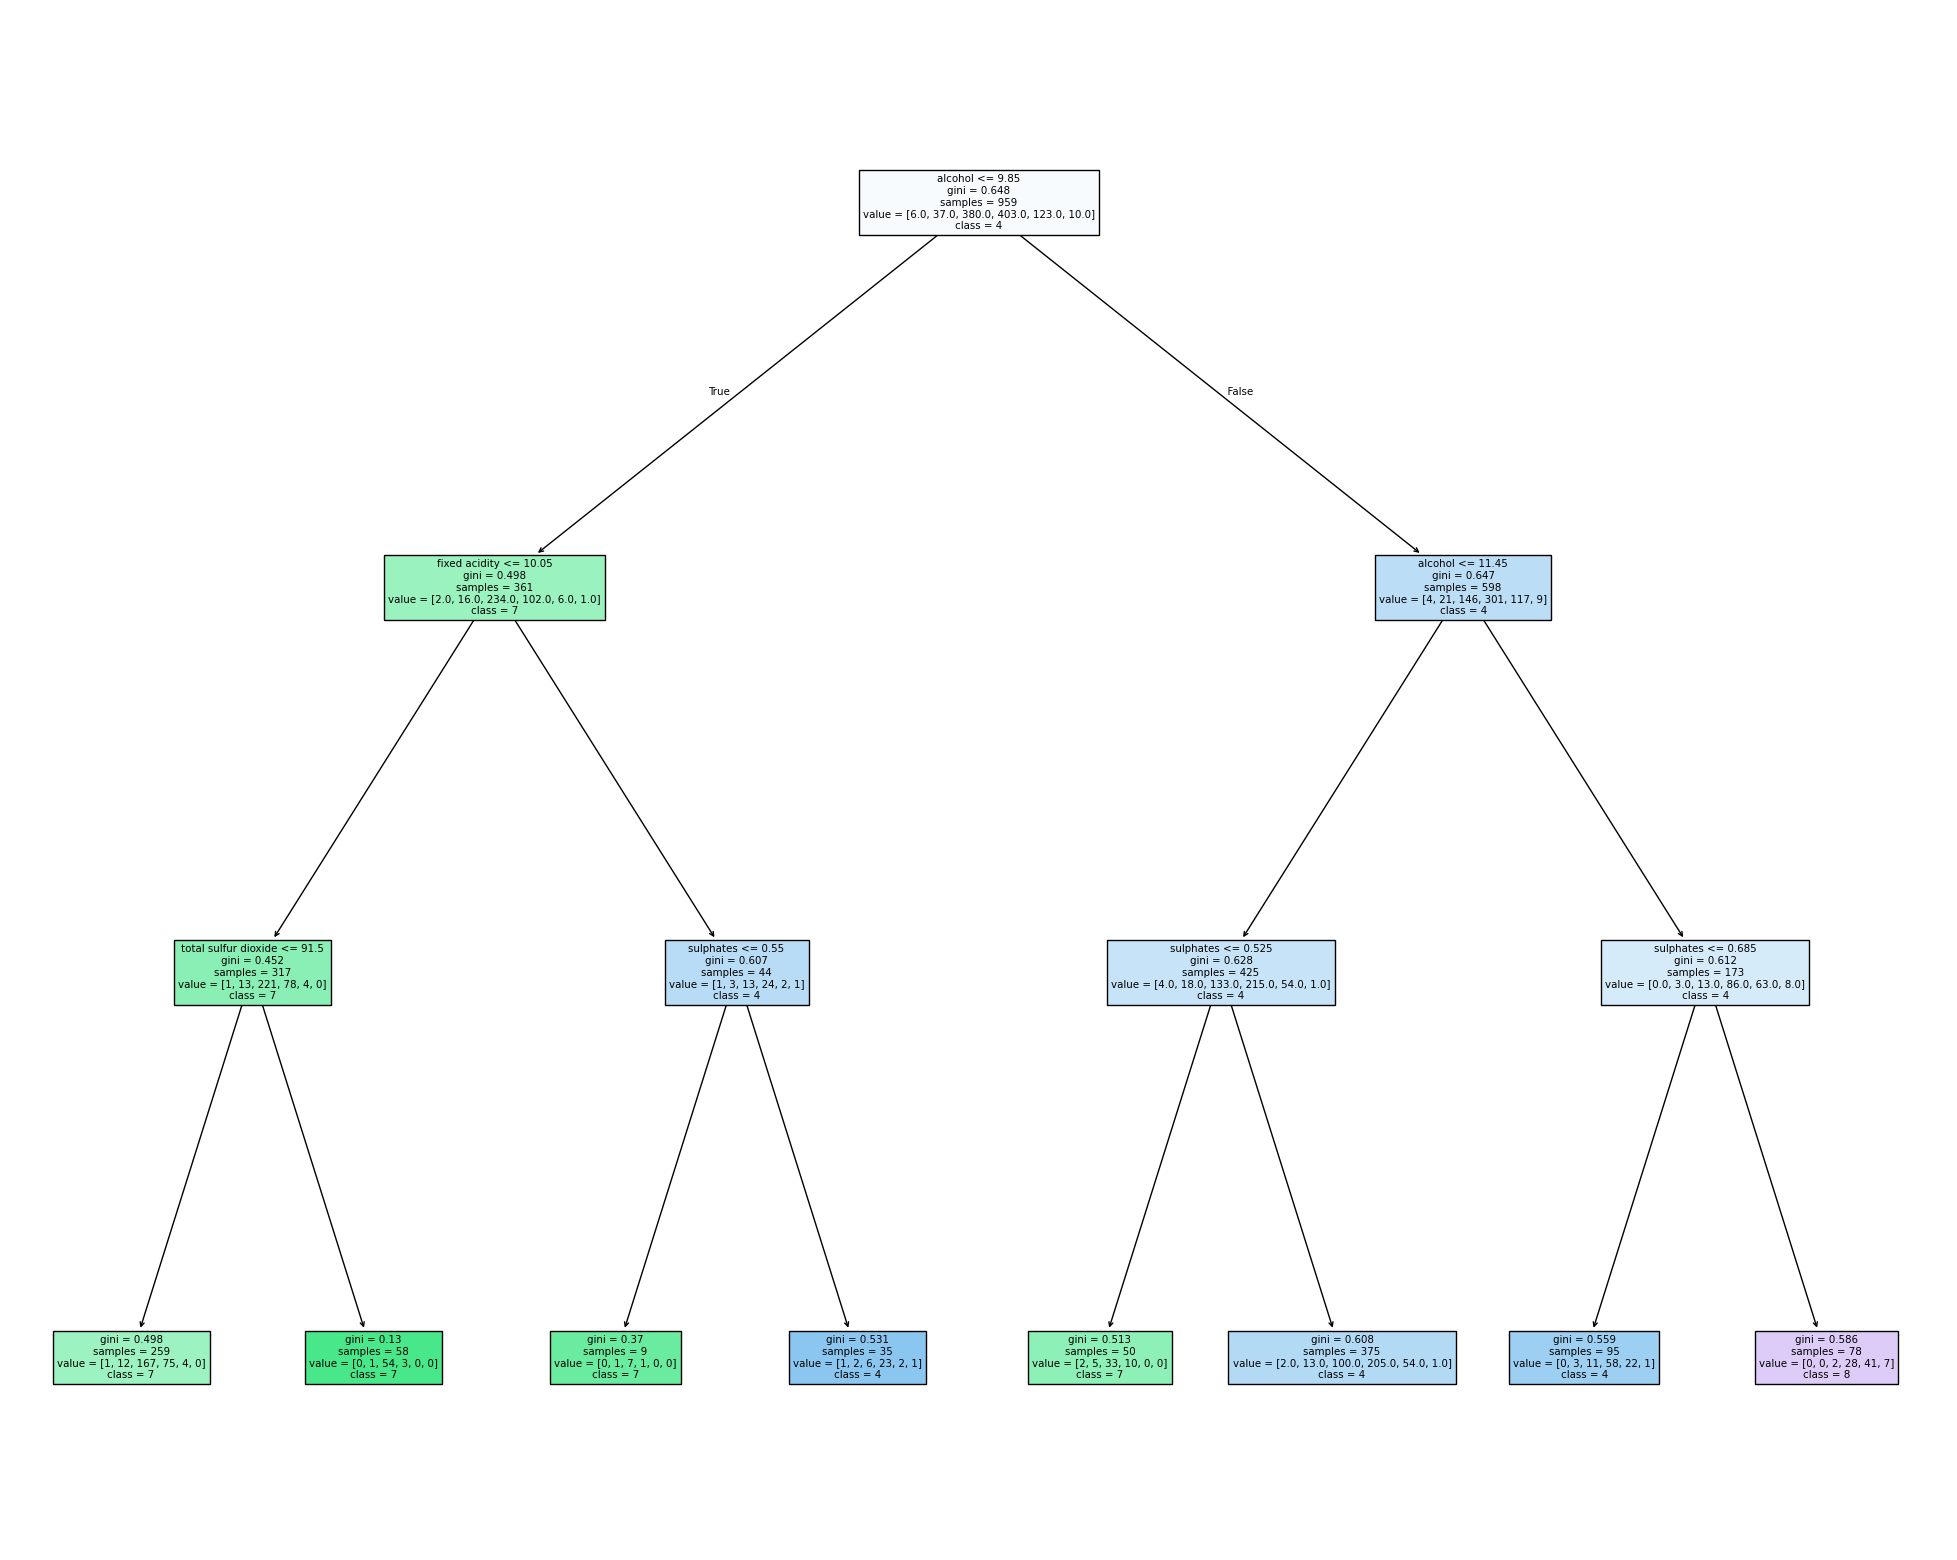

In [ ]:
gph = get_dt_graph(dt_depth)

In [ ]:
evaluate_model(dt_depth)

Accuracy: 0.5953125


Specifying minimum samples before split

In [ ]:
dt_min_split = DecisionTreeClassifier(min_samples_split=100)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=100)

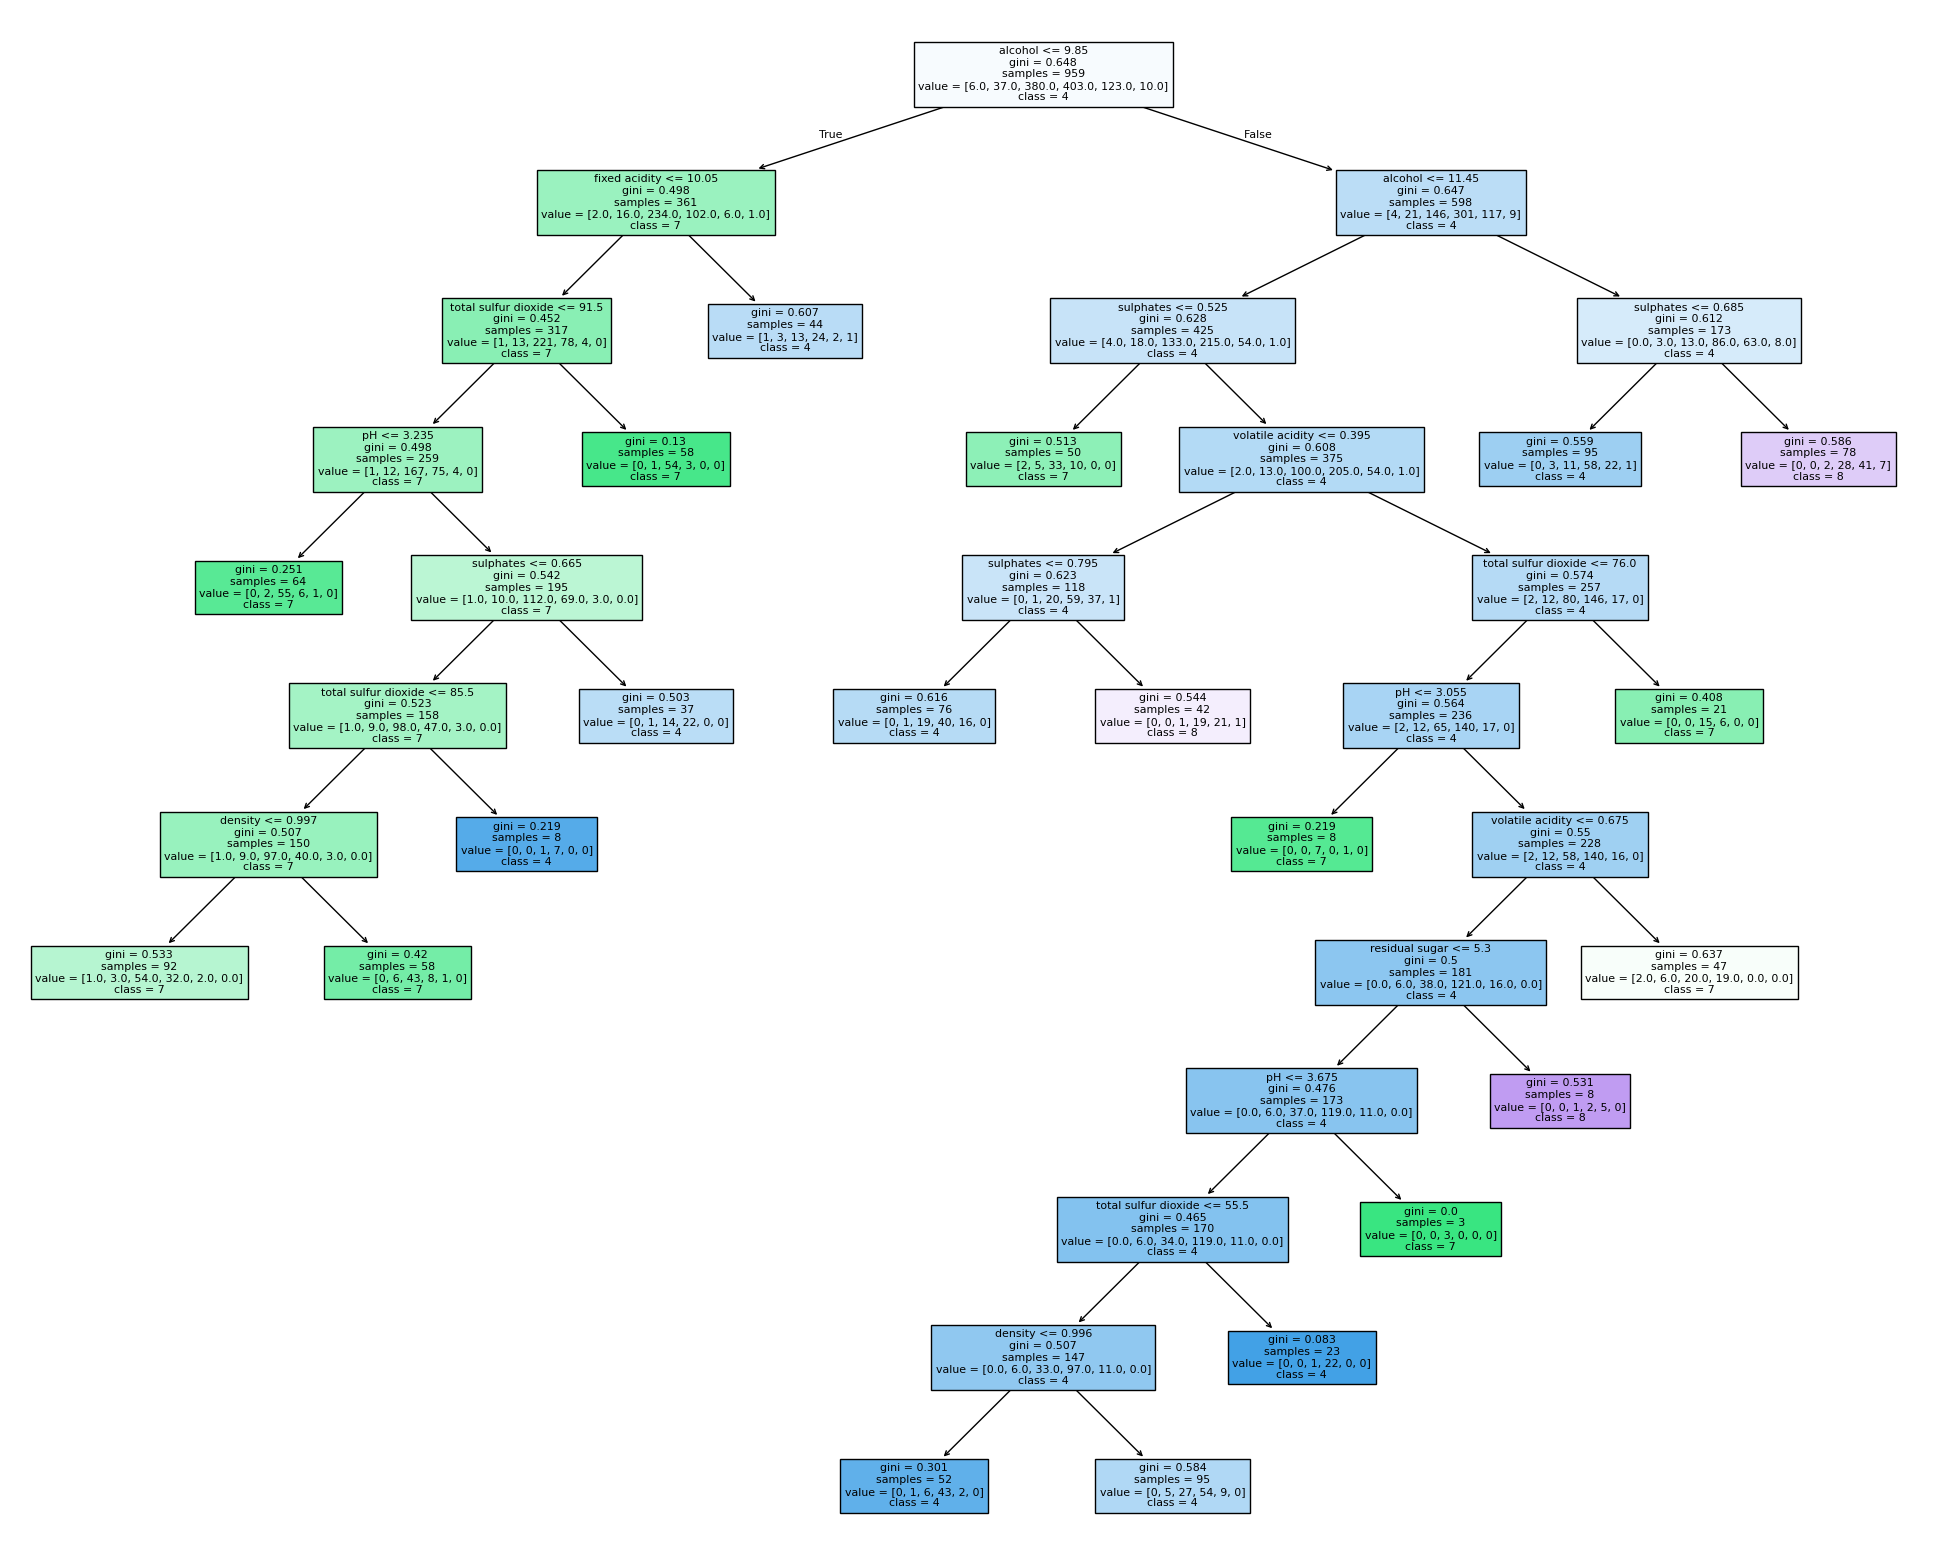

In [ ]:
gph = get_dt_graph(dt_min_split)

In [ ]:
evaluate_model(dt_min_split)

Accuracy: 0.5875


Specifying minimum samples in leaf node

In [ ]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=100, random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=100, random_state=42)

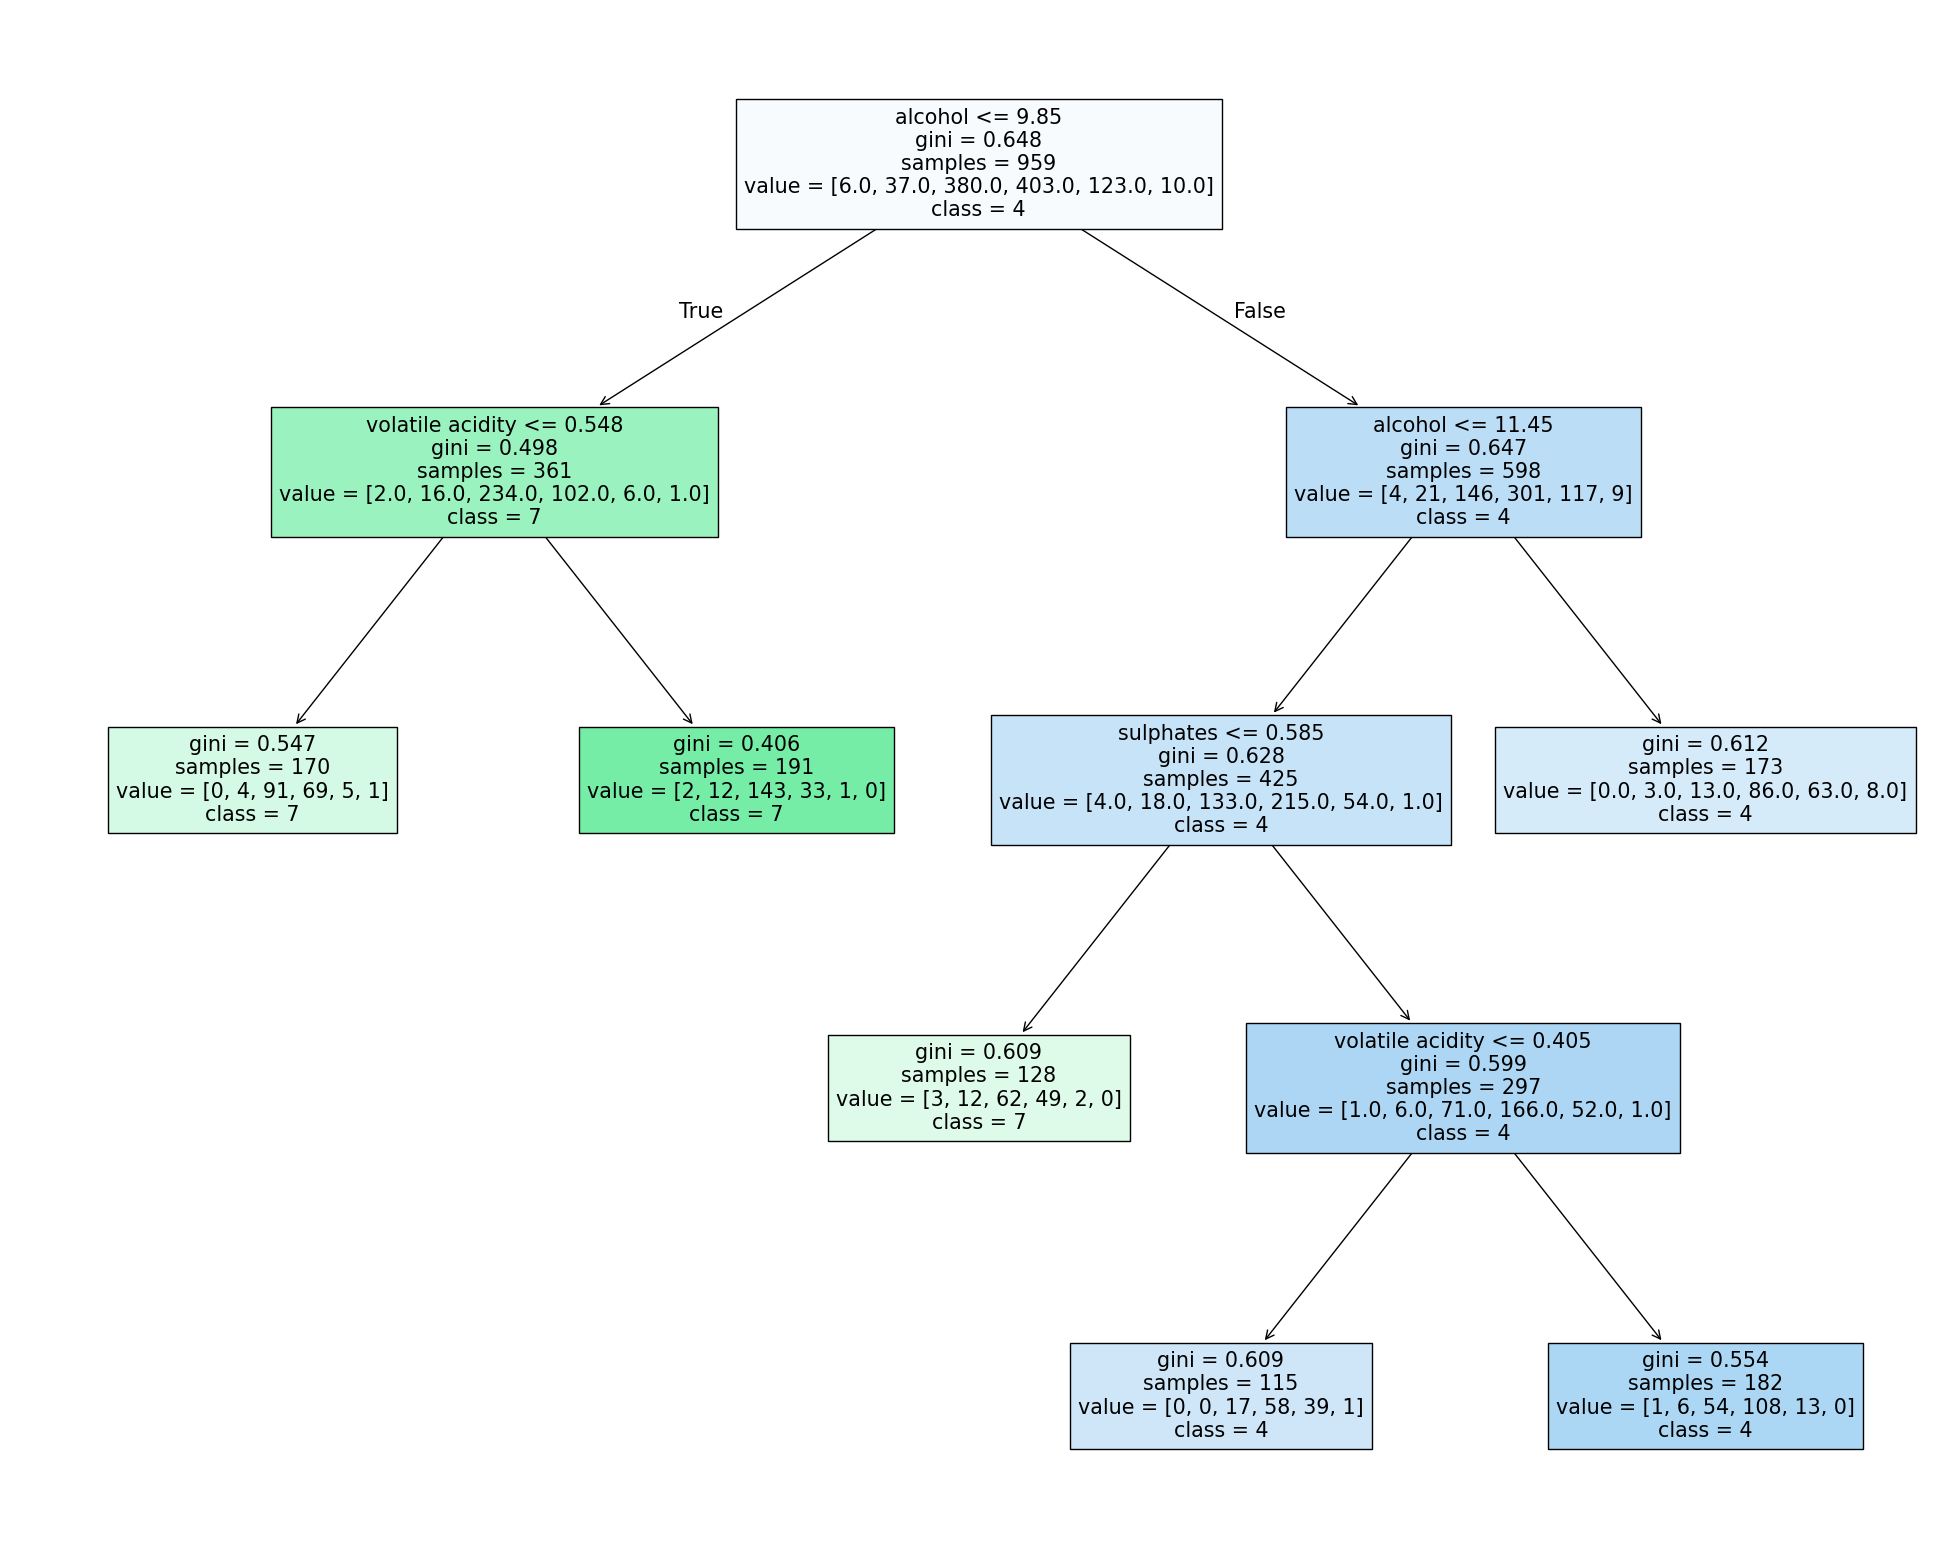

In [ ]:
gph = get_dt_graph(dt_min_leaf)

In [ ]:
evaluate_model(dt_min_leaf)

Accuracy: 0.590625


Using Entropy instead of Gini

In [ ]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=100, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=100,
                       random_state=42)

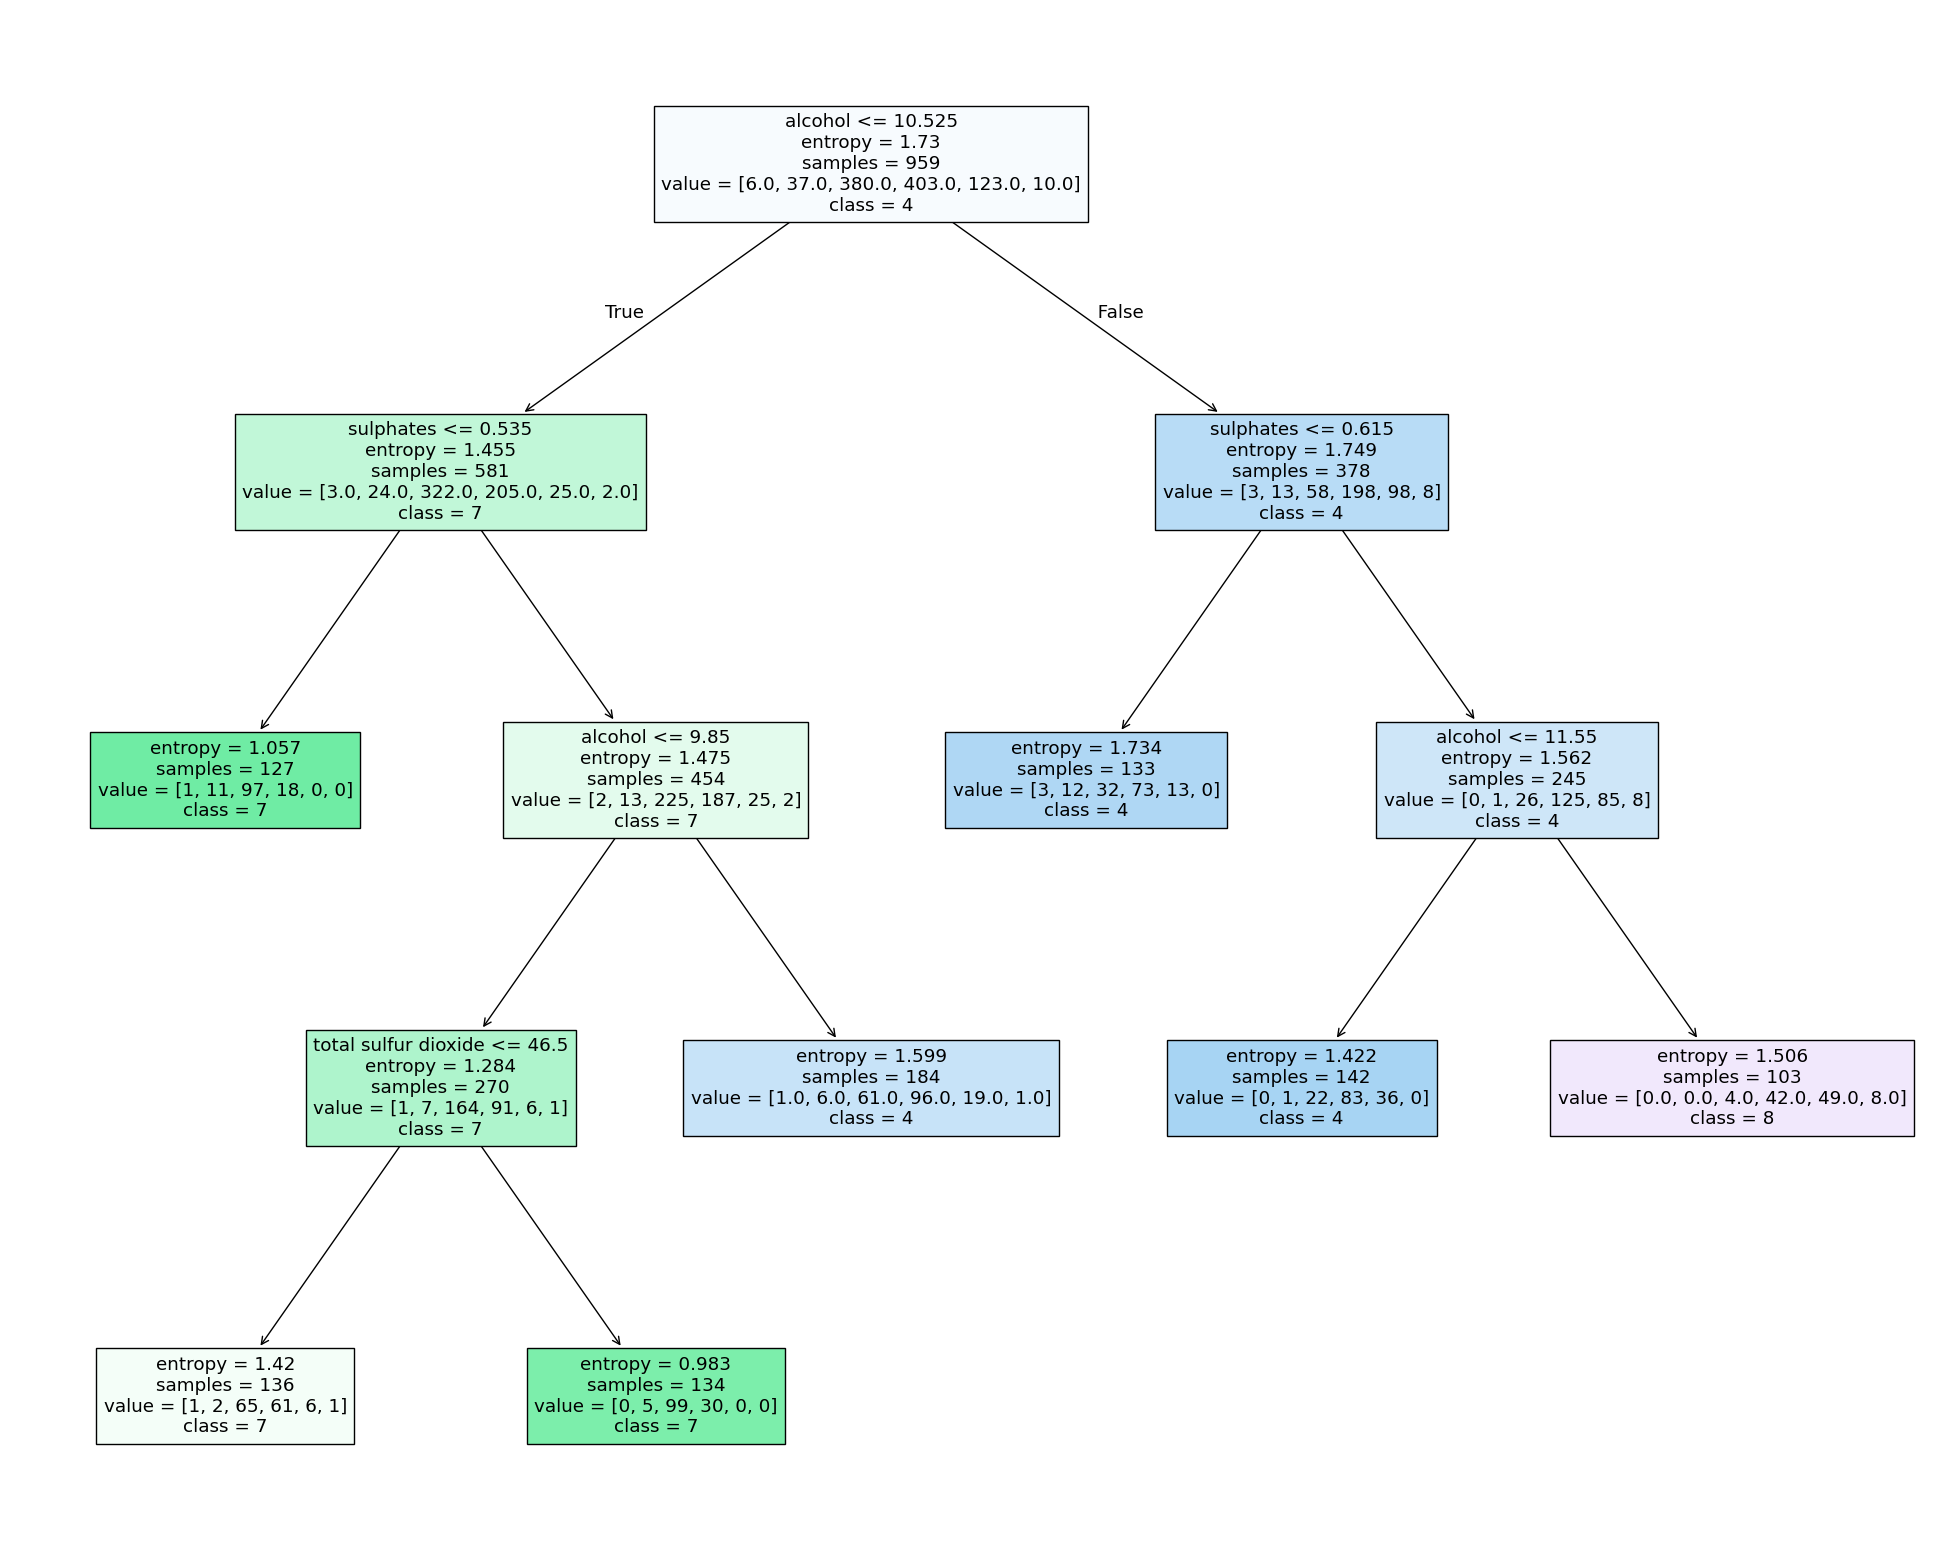

In [ ]:
gph = get_dt_graph(dt_min_leaf_entropy)

In [ ]:
evaluate_model(dt_min_leaf_entropy)

Accuracy: 0.590625


Hyper-parameter tuning

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search
params = {
    'max_depth': [2, 3, 5, 10],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [ ]:
grid_search = GridSearchCV(estimator=dt,
                            param_grid=params,
                            cv=4, n_jobs=-1, verbose=1, scoring = "f1")

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits
CPU times: user 194 ms, sys: 78.5 ms, total: 272 ms
Wall time: 3.83 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006437,0.000575,0.003304,0.000164,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.520833,0.541667,0.504167,0.539749,0.526604,0.015300,28
1,0.005747,0.000256,0.004035,0.001509,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.520833,0.541667,0.504167,0.539749,0.526604,0.015300,28
2,0.006064,0.000771,0.002964,0.000079,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.520833,0.541667,0.504167,0.539749,0.526604,0.015300,28
3,0.005392,0.000186,0.003023,0.000089,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.520833,0.541667,0.504167,0.539749,0.526604,0.015300,28
4,0.009249,0.003672,0.004483,0.002078,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.520833,0.541667,0.541667,0.539749,0.535979,0.008779,21


In [ ]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
37,0.019185,0.002840,0.007612,0.004610,entropy,10,20,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.554167,0.570833,0.583333,0.543933,0.563067,0.015136,1
36,0.014018,0.005206,0.003645,0.001063,entropy,10,10,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.525000,0.591667,0.550000,0.577406,0.561018,0.025625,2
33,0.015833,0.005292,0.007727,0.004460,entropy,5,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.537500,0.579167,0.562500,0.556485,0.558913,0.014895,3
38,0.013669,0.001017,0.012381,0.001786,entropy,10,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.537500,0.579167,0.562500,0.556485,0.558913,0.014895,3
29,0.006961,0.002278,0.003212,0.000360,entropy,3,100,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.516667,0.604167,0.575000,0.539749,0.558896,0.033387,5


In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=20,
                       random_state=42)

In [ ]:
dt_best = grid_search.best_estimator_
evaluate_model(dt_best)

Accuracy: 0.5984375


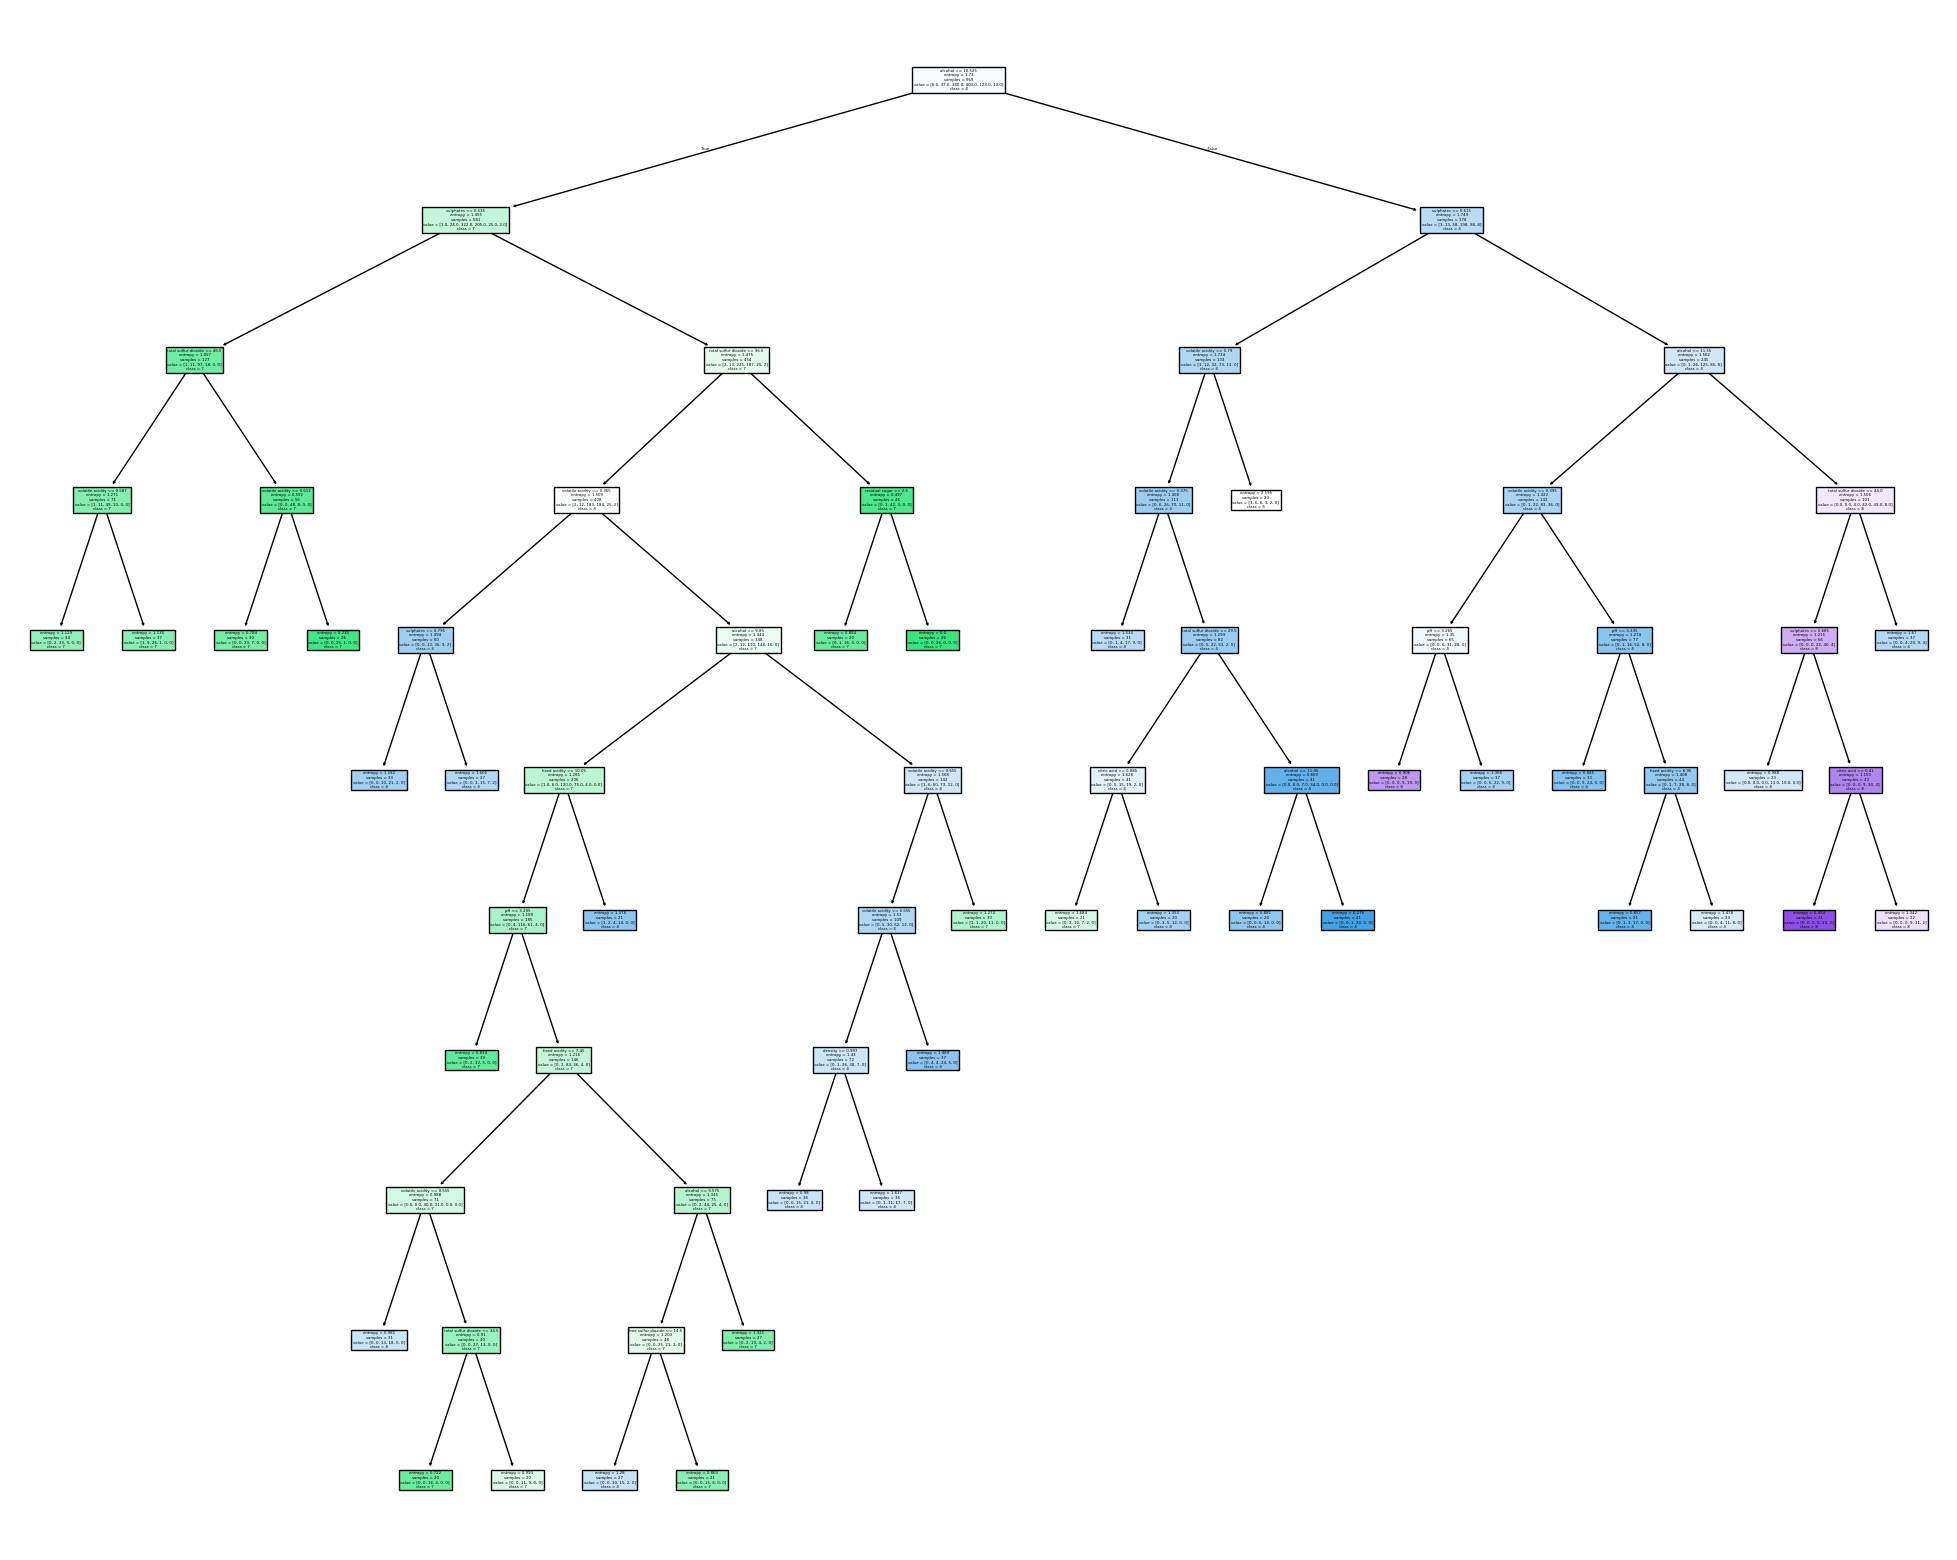

In [ ]:
get_dt_graph(dt_best)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.09      0.06      0.07        16
           5       0.72      0.67      0.70       301
           6       0.51      0.66      0.58       235
           7       0.53      0.33      0.41        76
           8       0.00      0.00      0.00         8

    accuracy                           0.60       640
   macro avg       0.31      0.29      0.29       640
weighted avg       0.59      0.60      0.59       640



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
